In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.sample(n=300, random_state=42)

In [29]:
age = df['Age'].unique()
age

array([63, 69, 60, 70, 58, 39, 27, 55, 24, 73, 50, 54, 77, 66, 18, 64, 79,
       71, 38, 47, 74, 40, 29, 57, 62, 35, 44, 43, 20, 61, 46, 32, 80, 53,
       67, 34, 76, 21, 68, 56, 22, 33, 37, 48, 30, 26, 49, 23, 78, 51, 28,
       19, 45, 72, 25, 31, 65, 42, 36, 52, 75])

In [43]:
bins = [18, 29, 44, 59, 100]
labels = ["Young Adults (18-29)", "Adults (30-44)", "Middle-Aged (45-59)", "Seniors (60+)"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

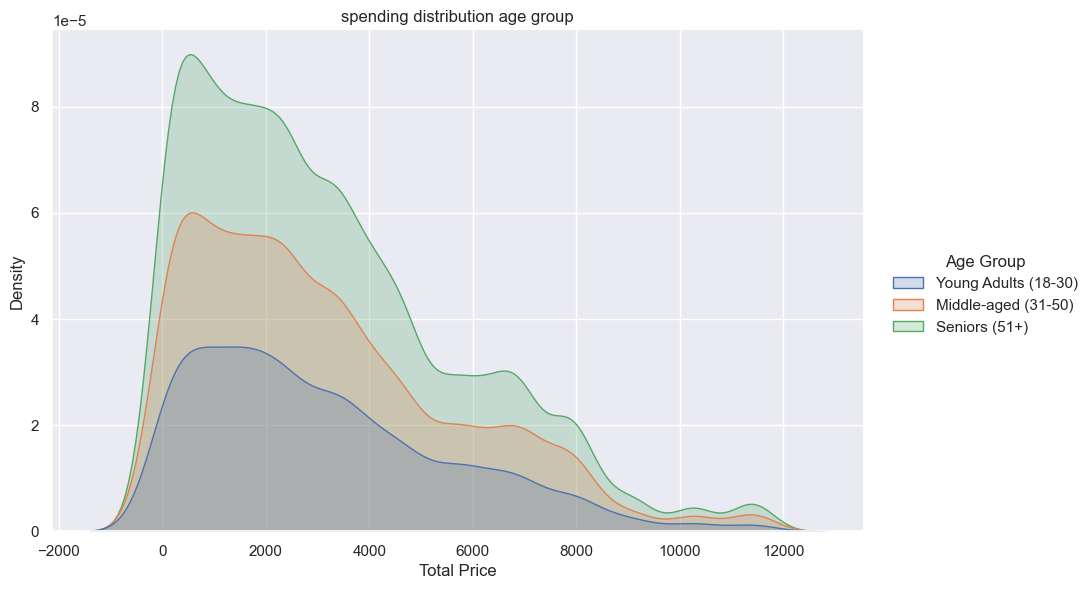

In [80]:
sns.displot(df, x="Total Price", hue="Age Group", kind="kde", fill=True, height=6, aspect=1.5)
plt.title("spending distribution age group")
plt.show()

C:\Users\loydt\AppData\Local\Temp\ipykernel_6524\3631491799.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Product Type", y="Total Price", estimator=sum, ci=None)


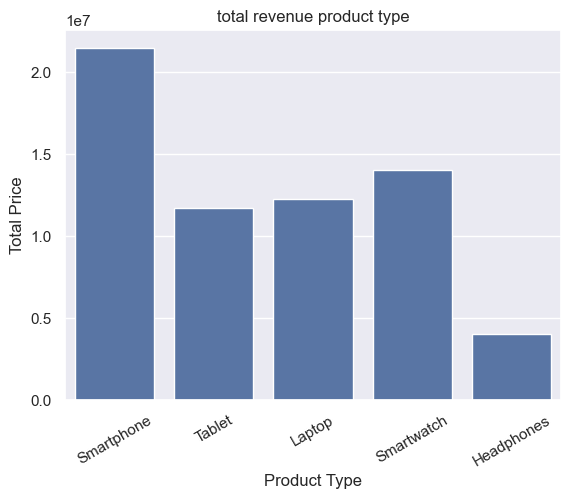

In [69]:
sns.barplot(data=df, x="Product Type", y="Total Price", estimator=sum, ci=None)
plt.xticks(rotation=30)
plt.title("total revenue product type")
plt.show()

In [46]:
df["Spending Tier"] = pd.qcut(df["Total Price"], q=3, labels=["Low", "Medium", "High"])

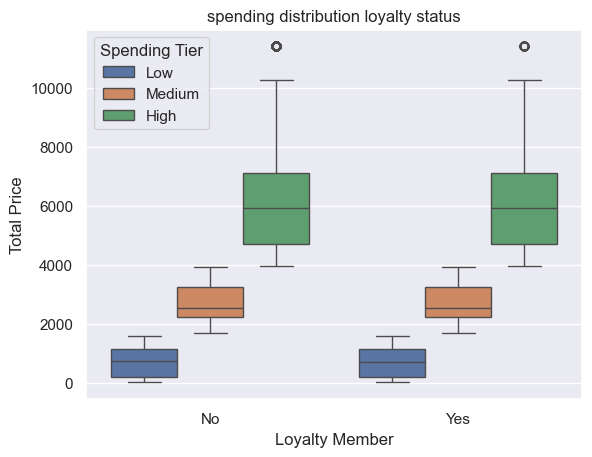

In [66]:
sns.boxplot(data=df, x="Loyalty Member", y="Total Price", hue="Spending Tier")
plt.title("spending distribution loyalty status")
plt.show()


In [ ]:
df["Average Order Value"] = df["Total Price"] / df["Quantity"]
customer_purchases = df.groupby("Customer ID")["Total Price"].count().reset_index()
customer_purchases.columns = ["Customer ID", "Purchase Frequency"]

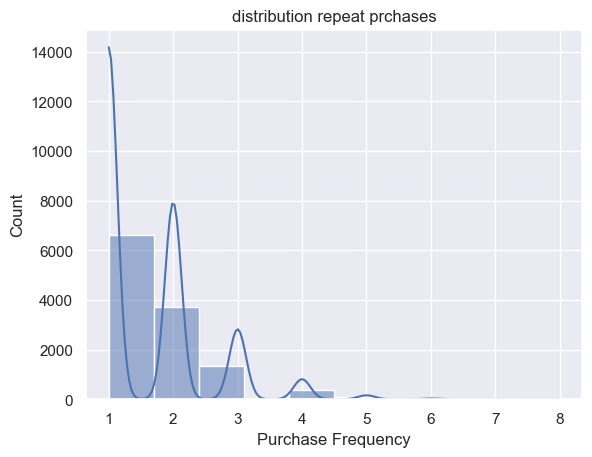

In [67]:
sns.histplot(customer_purchases["Purchase Frequency"], bins=10, kde=True)
plt.title("distribution repeat prchases")
plt.show()

In [51]:
df["Purchase Month"] = pd.to_datetime(df["Purchase Date"]).dt.month

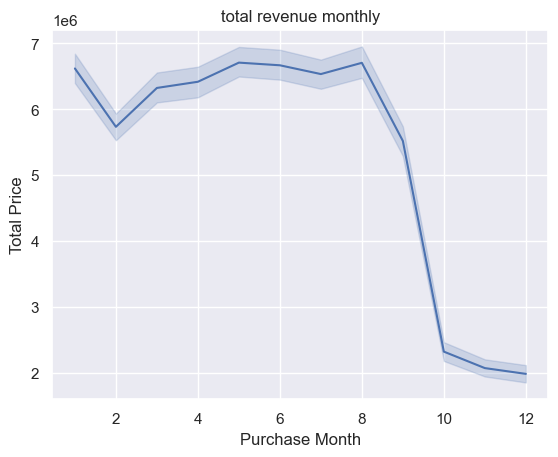

In [68]:
sns.lineplot(data=df, x="Purchase Month", y="Total Price", estimator=sum)
plt.title("total revenue monthly")
plt.show()

In [61]:
bins = [18, 30, 50, 80]  
labels = ["Young Adults (18-30)", "Middle-aged (31-50)", "Seniors (51+)"]  
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

df["Age Group"].value_counts()


Age Group
Seniors (51+)           9473
Middle-aged (31-50)     6458
Young Adults (18-30)    3768
Name: count, dtype: int64

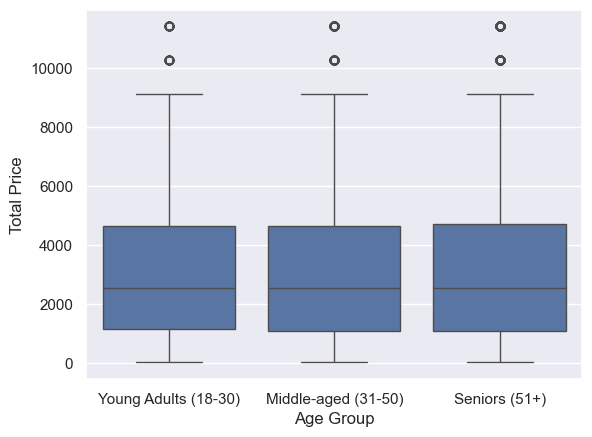

In [65]:
sns.boxplot(x="Age Group", y="Total Price", data=df)
plt.show()

In [63]:
df.groupby("Product Type")["Total Price"].sum().sort_values(ascending=False)

Product Type
Smartphone    21516754.69
Smartwatch    14036273.06
Laptop        12296239.97
Tablet        11712000.41
Headphones     4041400.24
Name: Total Price, dtype: float64

C:\Users\loydt\AppData\Local\Temp\ipykernel_6524\1050640605.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("Purchase Date").resample("M")["Total Price"].sum().plot()


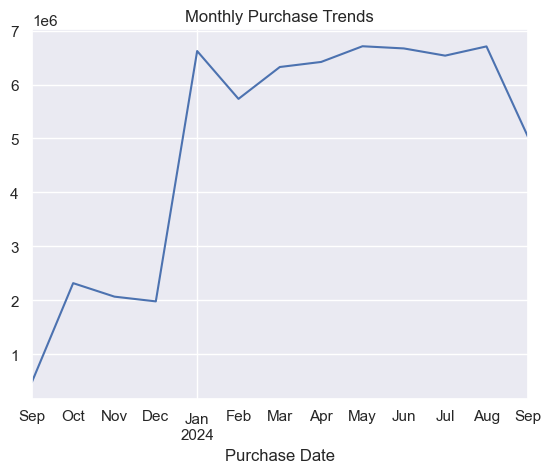

In [ ]:
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df.set_index("Purchase Date").resample("M")["Total Price"].sum().plot()
plt.title("monthly purchase trends")
plt.show()

In [71]:
df["AOV"] = df["Total Price"] / df["Quantity"]  
purchase_frequency = df.groupby("Customer ID")["Total Price"].count()  
df["CLV"] = df["AOV"] * purchase_frequency  

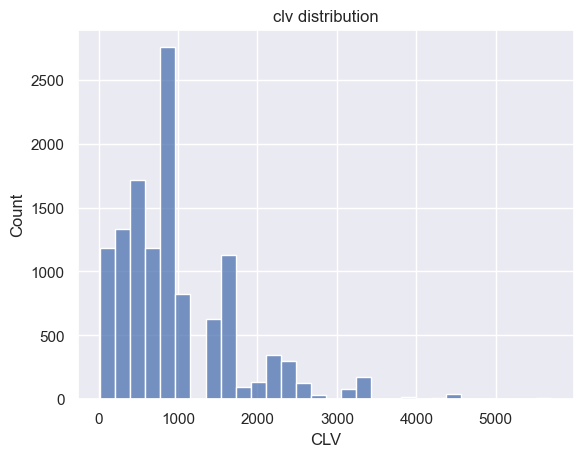

In [73]:
sns.histplot(df["CLV"], bins=30)
plt.title("clv distribution")
plt.show()

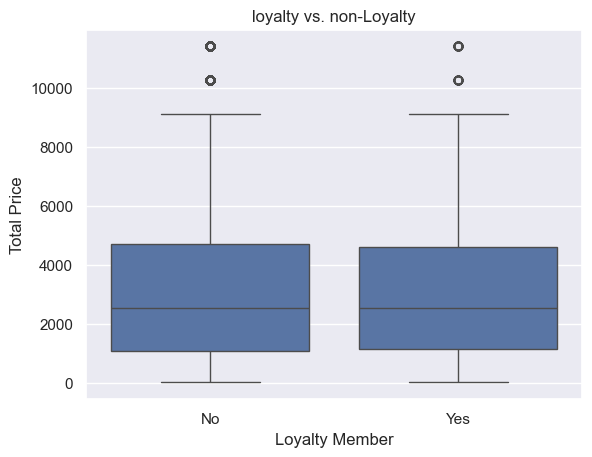

In [75]:
sns.boxplot(x="Loyalty Member", y="Total Price", data=df)
plt.title("loyalty vs. non-Loyalty")
plt.show()


C:\Users\loydt\AppData\Local\Temp\ipykernel_6524\1515344492.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_series = df.resample("M")["Total Price"].sum()
c:\Users\loydt\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


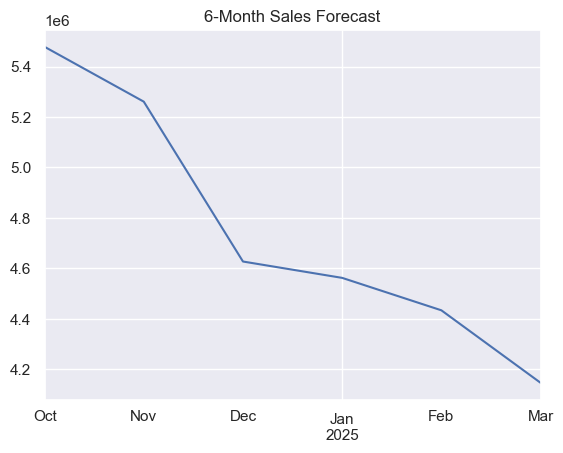

In [77]:
from statsmodels.tsa.arima.model import ARIMA

df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df.set_index("Purchase Date", inplace=True)
sales_series = df.resample("M")["Total Price"].sum()

model = ARIMA(sales_series, order=(5,1,0))
model_fit = model.fit()

future = model_fit.forecast(steps=6)
future.plot()
plt.title("6-Month Sales Forecast")
plt.show()
